# Fuzzy Control: The Tipping Problem

The ‘tipping problem’ is commonly used to illustrate the power of fuzzy logic principles to generate complex behavior from a compact, intuitive set of expert rules.

Inputs:
* **Service** (Ranges are: poor, acceptable, amazing)
* **Food Quality** (Ranges are: bad, decent, great)

Outputs:
* **Tip** (Ranges are: low, medimum, high)

Rules:
* IF the service was good or the food quality was good, THEN the tip will be high.
* IF the service was average, THEN the tip will be medium.
* IF the service was poor and the food quality was poor THEN the tip will be low.

In [1]:
!pip install --no-cache scikit-fuzzy==0.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 5.5 MB/s eta 0:00:006.3 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Inputs and Outputs

In [3]:
# Inputs
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')

# Outputs
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

In [5]:
# Partitioning of the Domains into Fuzzy Sets

quality.automf(3) # Automatic Membership Function
service.automf(3) # Automatic Membership Function

# Custom Membership Function
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13]) # Triangle from 0 to 13, centered in 0
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

/home/filippo/code/ai/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


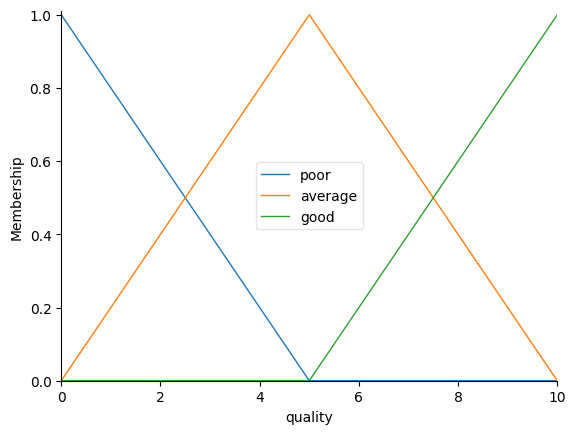

In [8]:
quality.view()

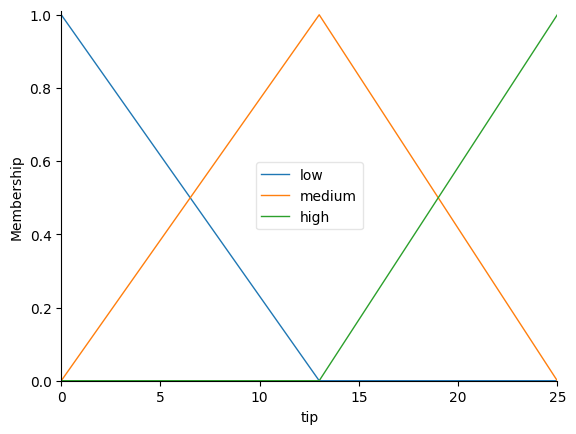

In [9]:
tip.view()

## Fuzzy Rules

In [10]:
rule1 = ctrl.Rule(quality['poor'] & service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

## Control System

In [11]:
# Tipping Control System
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Simulation object to test the Control System under manually-set inputs
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

### Control System Simulation

19.847607361963192


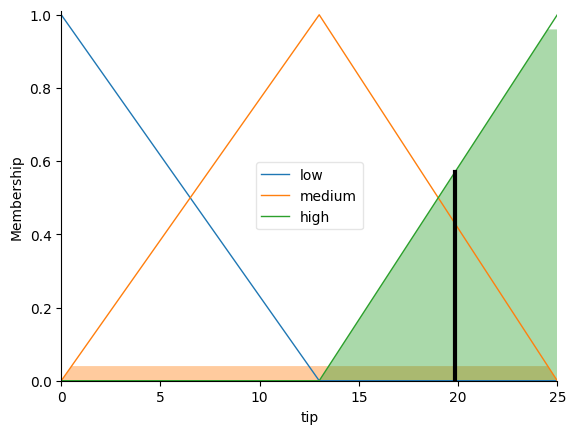

In [12]:
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

tipping.compute()

print(tipping.output['tip'])
tip.view(sim=tipping)